## Importation des différents fichiers de la FAO et des bibliothèques nécessaires

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
pop = pd.read_csv('fr_population.csv')
animaux = pd.read_csv('fr_animaux.csv')
vege = pd.read_csv('fr_vegetaux.csv')
cereales = pd.read_csv ('fr_céréales.csv')
s_alim = pd.read_csv('fr_sousalimentation.csv')

## Question 1

In [3]:
# On ne garde que les colonnes qui nous seront utiles pour le reste de l'analyse et on les renomme 
pop_2013 = pop[['Zone', 'Code zone', 'Année','Valeur']]
pop_2013 = pop_2013.rename(columns={'Zone' : 'country', 
                                                  'Code zone' : 'country_code',
                                                  'Année' : 'year',
                                                  'Valeur' : 'population'})
# On supprime les données en double si il y en a
pop_2013 = pop_2013.drop_duplicates()
pop_2013['population'].sum()*1000

8413993000

### Le chiffre semble assez élevé pour l'année 2013. Il faut regarder plus en profondeur le dataframe afin de trouver l'anomalie.

In [4]:
pop_2013.sort_values(by = 'population', ascending=False)

,country,country_code,year,population
33,Chine,351,2013,1416667
36,"Chine, continentale",41,2013,1385567
75,Inde,100,2013,1252140
55,États-Unis d'Amérique,231,2013,320051
76,Indonésie,101,2013,249866
...,...,...,...,...
89,Kiribati,83,2013,102
6,Antigua-et-Barbuda,8,2013,90
47,Dominique,55,2013,72
20,Bermudes,17,2013,65


### On remarque ici que la population de la Chine remonte 2 fois mais sous deux noms différents. La suppression des doublons n'a pas permis d'éliminer cette anomalie car les libellés ne sont pas identiques. Nous allons donc supprimer cette valeur du dataframe.


In [5]:
# On cherche les pays qui contiennent le mot "Chine"
pop_2013[pop_2013['country'].str.contains('Chine')][['country_code', 'country', 'population']]

,country_code,country,population
33,351,Chine,1416667
34,96,Chine - RAS de Hong-Kong,7204
35,128,Chine - RAS de Macao,566
36,41,"Chine, continentale",1385567
37,214,"Chine, Taiwan Province de",23330


In [6]:
# Création d'un index afin de récupérer la ligne concernée
indexNames = pop_2013[pop_2013['country'] == 'Chine' ].index
# Suppression la ligne "Chine continentale" du dataframe
pop_2013.drop(indexNames , inplace=True)
pop_2013.sort_values(by = 'population', ascending=False)

,country,country_code,year,population
36,"Chine, continentale",41,2013,1385567
75,Inde,100,2013,1252140
55,États-Unis d'Amérique,231,2013,320051
76,Indonésie,101,2013,249866
24,Brésil,21,2013,200362
...,...,...,...,...
89,Kiribati,83,2013,102
6,Antigua-et-Barbuda,8,2013,90
47,Dominique,55,2013,72
20,Bermudes,17,2013,65


In [7]:
newpop=sum(pop_2013.population)*1000
newpop

6997326000

### Nous devons désormais supprimer les doublons des autres dataframes

In [8]:
# Création d'un index afin de récupérer la ligne concernée
indexNames2 = animaux[ animaux['Zone'] == 'Chine' ].index
# Suppression la ligne "Chine continentale" du dataframe
animaux.drop(indexNames2 , inplace=True)
animaux.sort_values(by = 'Valeur', ascending=False)

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
16288,FBSH,Bilans Alimentaire (Ancienne méthodologie et p...,100,Inde,5511,Production,2848,Lait - Excl Beurre,2013,2013,Milliers de tonnes,135600.0,S,Données standardisées
16292,FBSH,Bilans Alimentaire (Ancienne méthodologie et p...,100,Inde,5301,Disponibilité intérieure,2848,Lait - Excl Beurre,2013,2013,Milliers de tonnes,133443.0,S,Données standardisées
16296,FBSH,Bilans Alimentaire (Ancienne méthodologie et p...,100,Inde,5142,Nourriture,2848,Lait - Excl Beurre,2013,2013,Milliers de tonnes,105807.0,S,Données standardisées
12048,FBSH,Bilans Alimentaire (Ancienne méthodologie et p...,231,États-Unis d'Amérique,5511,Production,2848,Lait - Excl Beurre,2013,2013,Milliers de tonnes,91277.0,S,Données standardisées
12052,FBSH,Bilans Alimentaire (Ancienne méthodologie et p...,231,États-Unis d'Amérique,5301,Disponibilité intérieure,2848,Lait - Excl Beurre,2013,2013,Milliers de tonnes,87965.0,S,Données standardisées
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27343,FBSH,Bilans Alimentaire (Ancienne méthodologie et p...,170,Pérou,5072,Variation de stock,2781,Huiles de Poissons,2013,2013,Milliers de tonnes,-90.0,S,Données standardisées
34042,FBSH,Bilans Alimentaire (Ancienne méthodologie et p...,216,Thaïlande,5301,Disponibilité intérieure,2735,"Viande, Autre",2013,2013,Milliers de tonnes,-92.0,S,Données standardisées
2175,FBSH,Bilans Alimentaire (Ancienne méthodologie et p...,10,Australie,5072,Variation de stock,2848,Lait - Excl Beurre,2013,2013,Milliers de tonnes,-106.0,S,Données standardisées
27134,FBSH,Bilans Alimentaire (Ancienne méthodologie et p...,150,Pays-Bas,5072,Variation de stock,2848,Lait - Excl Beurre,2013,2013,Milliers de tonnes,-608.0,S,Données standardisées


In [9]:
# Création d'un index afin de récupérer la ligne concernée
indexNames3 = vege[vege['Zone'] == 'Chine' ].index
# Suppression la ligne "Chine continentale" du dataframe
vege.drop(indexNames3 , inplace=True)
vege.sort_values(by = 'Valeur', ascending=False)

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
14527,FBSH,Bilans Alimentaire (Ancienne méthodologie et p...,21,Brésil,5301,Disponibilité intérieure,2536,"Sucre, canne",2013,2013,Milliers de tonnes,739267.0,S,Données standardisées
14525,FBSH,Bilans Alimentaire (Ancienne méthodologie et p...,21,Brésil,5511,Production,2536,"Sucre, canne",2013,2013,Milliers de tonnes,739267.0,S,Données standardisées
22553,FBSH,Bilans Alimentaire (Ancienne méthodologie et p...,41,"Chine, continentale",5511,Production,2605,"Légumes, Autres",2013,2013,Milliers de tonnes,507850.0,S,Données standardisées
22557,FBSH,Bilans Alimentaire (Ancienne méthodologie et p...,41,"Chine, continentale",5301,Disponibilité intérieure,2605,"Légumes, Autres",2013,2013,Milliers de tonnes,500070.0,S,Données standardisées
22560,FBSH,Bilans Alimentaire (Ancienne méthodologie et p...,41,"Chine, continentale",5142,Nourriture,2605,"Légumes, Autres",2013,2013,Milliers de tonnes,426850.0,S,Données standardisées
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35606,FBSH,Bilans Alimentaire (Ancienne méthodologie et p...,185,Fédération de Russie,5072,Variation de stock,2511,Blé,2013,2013,Milliers de tonnes,-4500.0,S,Données standardisées
4970,FBSH,Bilans Alimentaire (Ancienne méthodologie et p...,9,Argentine,5072,Variation de stock,2555,Soja,2013,2013,Milliers de tonnes,-4920.0,S,Données standardisées
22076,FBSH,Bilans Alimentaire (Ancienne méthodologie et p...,41,"Chine, continentale",5072,Variation de stock,2514,Maïs,2013,2013,Milliers de tonnes,-8509.0,S,Données standardisées
18647,FBSH,Bilans Alimentaire (Ancienne méthodologie et p...,33,Canada,5072,Variation de stock,2511,Blé,2013,2013,Milliers de tonnes,-9262.0,S,Données standardisées


In [10]:
# Création d'un index afin de récupérer la ligne concernée
indexNames4 = cereales[cereales['Zone'] == 'Chine' ].index
# Suppression la ligne "Chine continentale" du dataframe
cereales.drop(indexNames4 , inplace=True)
cereales.sort_values(by = 'Valeur', ascending=False)

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
276,FBSH,Bilans Alimentaire (Ancienne méthodologie et p...,231,États-Unis d'Amérique,5511,Production,2514,Maïs,2013,2013,Milliers de tonnes,353699,S,Données standardisées
181,FBSH,Bilans Alimentaire (Ancienne méthodologie et p...,41,"Chine, continentale",5511,Production,2514,Maïs,2013,2013,Milliers de tonnes,218489,S,Données standardisées
179,FBSH,Bilans Alimentaire (Ancienne méthodologie et p...,41,"Chine, continentale",5511,Production,2805,Riz (Eq Blanchi),2013,2013,Milliers de tonnes,135809,S,Données standardisées
178,FBSH,Bilans Alimentaire (Ancienne méthodologie et p...,41,"Chine, continentale",5511,Production,2511,Blé,2013,2013,Milliers de tonnes,121926,S,Données standardisées
379,FBSH,Bilans Alimentaire (Ancienne méthodologie et p...,100,Inde,5511,Production,2805,Riz (Eq Blanchi),2013,2013,Milliers de tonnes,106186,S,Données standardisées
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
510,FBSH,Bilans Alimentaire (Ancienne méthodologie et p...,132,Maldives,5511,Production,2518,Sorgho,2013,2013,Milliers de tonnes,0,S,Données standardisées
798,FBSH,Bilans Alimentaire (Ancienne méthodologie et p...,208,Tadjikistan,5511,Production,2520,"Céréales, Autres",2013,2013,Milliers de tonnes,0,S,Données standardisées
796,FBSH,Bilans Alimentaire (Ancienne méthodologie et p...,208,Tadjikistan,5511,Production,2517,Millet,2013,2013,Milliers de tonnes,0,S,Données standardisées
519,FBSH,Bilans Alimentaire (Ancienne méthodologie et p...,134,Malte,5511,Production,2520,"Céréales, Autres",2013,2013,Milliers de tonnes,0,S,Données standardisées


In [11]:
# Création d'un index afin de récupérer la ligne concernée
indexNames5 = s_alim[s_alim['Zone'] == 'Chine' ].index
# Suppression la ligne "Chine continentale" du dataframe
s_alim.drop(indexNames5 , inplace=True)
s_alim.sort_values(by = 'Valeur', ascending=False)

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
584,FS,Données de la sécurité alimentaire,137,Maurice,6132,Valeur,210011,Nombre de personnes sous-alimentées (millions)...,20162018,2016-2018,millions,<0.1,F,Estimation FAO,NaN
423,FS,Données de la sécurité alimentaire,25,Îles Salomon,6132,Valeur,210011,Nombre de personnes sous-alimentées (millions)...,20152017,2015-2017,millions,<0.1,F,Estimation FAO,NaN
495,FS,Données de la sécurité alimentaire,83,Kiribati,6132,Valeur,210011,Nombre de personnes sous-alimentées (millions)...,20122014,2012-2014,millions,<0.1,F,Estimation FAO,NaN
496,FS,Données de la sécurité alimentaire,83,Kiribati,6132,Valeur,210011,Nombre de personnes sous-alimentées (millions)...,20132015,2013-2015,millions,<0.1,F,Estimation FAO,NaN
497,FS,Données de la sécurité alimentaire,83,Kiribati,6132,Valeur,210011,Nombre de personnes sous-alimentées (millions)...,20142016,2014-2016,millions,<0.1,F,Estimation FAO,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
985,FS,Données de la sécurité alimentaire,234,Uruguay,6132,Valeur,210011,Nombre de personnes sous-alimentées (millions)...,20122014,2012-2014,millions,NaN,NR,Non rapportée,NaN
986,FS,Données de la sécurité alimentaire,234,Uruguay,6132,Valeur,210011,Nombre de personnes sous-alimentées (millions)...,20132015,2013-2015,millions,NaN,NR,Non rapportée,NaN
987,FS,Données de la sécurité alimentaire,234,Uruguay,6132,Valeur,210011,Nombre de personnes sous-alimentées (millions)...,20142016,2014-2016,millions,NaN,NR,Non rapportée,NaN
988,FS,Données de la sécurité alimentaire,234,Uruguay,6132,Valeur,210011,Nombre de personnes sous-alimentées (millions)...,20152017,2015-2017,millions,NaN,NR,Non rapportée,NaN


# Question 2

In [186]:
# Création de deux dataframes et d'une colonne "origine" distinguant "animal" et "végétal"
bilan_alim_anim = animaux
bilan_alim_anim['origin'] = 'animal'
bilan_alim_veg = vege
bilan_alim_veg['origin'] = 'vegetal'

# Jointure entre les deux tables
# Suppression des tables crées précédemment
bilan_alim = bilan_alim_anim.append(bilan_alim_veg)
del bilan_alim_anim
del bilan_alim_veg

# Transformation en table pivot 
# Renommage des colonnes 
bilan_alim = pd.pivot_table(bilan_alim, index=['Code zone', 'Zone', 'Code Produit', 'Produit', 'origin'], 
                            columns = 'Élément', values = 'Valeur', aggfunc=np.sum).reset_index()
bilan_alim.columns.name = None
bilan_alim = bilan_alim.rename(columns = {'Zone' : 'country', 
                                          'Code zone' : 'country_code', 
                                          'Produit' : 'product', 
                                          'Code Produit' : 'product_code', 
                                          'Année' : 'year',
                                          'Aliments pour animaux' : 'alim_anim',
                                          'Nourriture' : 'food',
                                          'Disponibilité alimentaire (Kcal/personne/jour)' : 'dispo_kcal_p_j',
                                          'Disponibilité alimentaire en quantité (kg/personne/an)' : 'dispo_kg_p_an',
                                          'Disponibilité de matière grasse en quantité (g/personne/jour)' : 'dispo_mat_g_p_j',
                                          'Disponibilité de protéines en quantité (g/personne/jour)' : 'dispo_prot_g_p_j',
                                          'Disponibilité intérieure': 'dispo_int',
                                          'Exportations - Quantité' : 'exports',
                                          'Importations - Quantité' : 'imports',
                                          'Pertes' : 'loss',
                                          'Production' : 'prod',
                                          'Semences' : 'seeds',
                                          'Traitement' : 'treat',
                                          'Autres utilisations (non alimentaire)' : 'other',
                                          'Variation de stock' : 'var_stock'})

# Jointure interne entre le dataframe bilan_alim et pop_2013
bilan_alim = pd.merge(bilan_alim, pop_2013, on =['country', 'country_code'])

# Remplacement des valeurs inf par des NaN
bilan_alim.replace([np.inf, -np.inf], np.nan)

,country_code,country,product_code,product,origin,alim_anim,other,dispo_kcal_p_j,dispo_kg_p_an,dispo_mat_g_p_j,...,exports,imports,food,loss,prod,seeds,treat,var_stock,year,population
0,1,Arménie,2511,Blé,vegetal,93.0,0.0,1024.0,130.60,3.60,...,1.0,361.0,389.0,32.0,312.0,30.0,10.0,-118.0,2013,2977
1,1,Arménie,2513,Orge,vegetal,137.0,26.0,0.0,0.00,0.00,...,0.0,9.0,0.0,15.0,189.0,14.0,7.0,0.0,2013,2977
2,1,Arménie,2514,Maïs,vegetal,96.0,NaN,0.0,0.03,NaN,...,NaN,82.0,0.0,7.0,21.0,0.0,NaN,NaN,2013,2977
3,1,Arménie,2515,Seigle,vegetal,1.0,NaN,1.0,0.12,0.00,...,NaN,0.0,0.0,0.0,1.0,0.0,NaN,0.0,2013,2977
4,1,Arménie,2516,Avoine,vegetal,4.0,NaN,2.0,0.37,0.03,...,NaN,1.0,1.0,0.0,5.0,0.0,NaN,NaN,2013,2977
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15600,276,Soudan,2763,Poissons Pelagiques,animal,NaN,0.0,0.0,0.00,0.00,...,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,2013,37964
15601,276,Soudan,2764,"Poissons Marins, Autres",animal,NaN,0.0,0.0,0.13,0.01,...,NaN,NaN,5.0,NaN,5.0,NaN,NaN,NaN,2013,37964
15602,276,Soudan,2805,Riz (Eq Blanchi),vegetal,NaN,NaN,14.0,1.27,0.05,...,NaN,33.0,48.0,NaN,17.0,1.0,NaN,0.0,2013,37964
15603,276,Soudan,2848,Lait - Excl Beurre,animal,NaN,0.0,315.0,155.20,20.01,...,0.0,232.0,5892.0,NaN,5660.0,NaN,0.0,NaN,2013,37964


In [192]:
# Création d'un dataframe temporaire avec restriction sur le blé en France
temp = bilan_alim.loc[(bilan_alim['country'] == 'France') & (bilan_alim['product'] == 'Blé')]

In [193]:
# Calcul de la consommation intérieure à partir de l'alimentation animale, la nourriture, les semences,  les pertes, le traitement et autres utilisations
conso_ble_fr = temp['alim_anim'].sum() + temp['food'].sum() + temp['seeds'].sum() + temp['loss'].sum() + temp['treat'].sum() + temp['other'].sum()
conso_ble_fr

20298.0

In [194]:
# Calcul de la disponibilité intérieure du blé en France
dispo_int_ble_fr = temp['dispo_int'].sum()
dispo_int_ble_fr

20298.0

In [195]:
# Calcul de la disponibilité intérieure à partir de la production, des imports, des exports de de la variation de stocks
prod_ble_fr = temp['prod'].sum() + (temp['imports'].sum() - temp['exports'].sum()) + temp['var_stock'].sum()
prod_ble_fr

20298.0

# Question 3

### Afin de faciliter les calculs et de les rendre plus lisibles, nous allons définir des valeurs par défaut qui ne sont pas disponibles dans les différents dataframes mais qui nous seront utiles tout au long de l'analyse.

In [14]:
NB_J = 365
CONVERSION_T_KG = 1000000
CONVERSION_G_KG = 1000

In [15]:
# Remplacement des valeurs inf par des Nan dans les trois colonnes nécessaires aux calculs et on supprime les lignes avec seulement des valeurs nulles si il y en a
bilan_alim= bilan_alim.replace([np.inf, -np.inf], np.nan).dropna(subset=["dispo_kg_p_an"], how="all")
bilan_alim= bilan_alim.replace([np.inf, -np.inf], np.nan).dropna(subset=["dispo_kcal_p_j"], how="all")
bilan_alim= bilan_alim.replace([np.inf, -np.inf], np.nan).dropna(subset=["dispo_prot_g_p_j"], how="all")

In [16]:
# Création d'une colonne contenant la disponibilité alimentaire en kcal
bilan_alim['dispo_alim_kcal'] = bilan_alim['dispo_kcal_p_j']* (bilan_alim['population']*1000)* NB_J
# Création d'une colonne contenant la disponibilité alimentaire en protéines
bilan_alim['dispo_alim_prot_kg'] = (bilan_alim['dispo_prot_g_p_j'] / CONVERSION_G_KG) * (bilan_alim['population']*1000) * NB_J

# Question 4

In [17]:
# Création d'une colonne contenant le ratio énergie/poids
bilan_alim['energy/w'] = bilan_alim['dispo_alim_kcal']/(bilan_alim['dispo_kg_p_an']*1000*bilan_alim['population'])

In [18]:
# Création d'un dataframe temporaire filtré sur le produit "Oeufs"
temp = bilan_alim[bilan_alim['product'].str.contains("Oeufs")]

In [19]:
# Calcul de la valeur calorique d'un oeuf de 100g
egg_ve = temp.replace([np.inf, -np.inf], np.nan).dropna(subset=['energy/w'], how="all")
egg_ratio = egg_ve['energy/w'].mean()/10
egg_ratio = int(egg_ratio)
egg_ratio

136

### Le chiffre trouvé est légèrement inférieur aux données trouvées sur internet (147kcal) : https://fr.wikipedia.org/wiki/%C5%92uf_(aliment)

In [20]:
# Ajout d'une colonne contenant le pourcentage de protéines
bilan_alim['percent_prot'] = (bilan_alim['dispo_alim_prot_kg'] /(bilan_alim['dispo_kg_p_an']*1000*bilan_alim['population']))*100

In [21]:
# Création d'un dataframe temporaire filtré sur le produit "Avoine"
temp = bilan_alim[bilan_alim['product'].str.contains("Avoine")]

In [22]:
# Remplacement des valeurs inf par des Nan dans la nouvelle colonne crée précédemment
# Suppression des lignes avec seulement des valeurs nulles si il y en a
temp = temp.replace([np.inf, -np.inf], np.nan).dropna(subset=['percent_prot'], how="all")

In [23]:
# Sélection des valeurs au dessus de 0 dans la colonne correspondant à la disponibilité alimentaire de protéines en kg afin de ne pas fausser le calcul de la moyenne 
temp = temp[temp['dispo_alim_prot_kg'] > 0]

In [24]:
# Calcul du pourcentage moyen de protéines pour le produit "Avoine"
round(temp['percent_prot'].mean(),1)

8.8

# Question 5

In [25]:
# Création d'un nouveau dataframe grâce à une agrégation sur la moyenne par produit
top_product_cal = bilan_alim.groupby(bilan_alim['product']).agg('mean')
# Remplacement des valeurs infinis par des NaN
top_product_cal= top_product_cal.replace([-np.inf, np.inf], np.nan)
top_product_cal = top_product_cal.sort_values('energy/w', ascending = False)
top_product_cal = top_product_cal[['energy/w']].reset_index()
# On affiche les 5 premiers produits les plus caloriques
top_product_cal.head(5)

,product,energy/w
0,Huile de Sésame,9559.523810
1,Huile de Germe de Maïs,8950.891229
2,Huile d'Olive,8774.038462
3,Huile de Tournesol,8769.634357
4,Huile de Soja,8737.921301


In [26]:
# Création d'un nouveau dataframe grâce à une agrégation sur la moyenne par produit
top_product_prot = bilan_alim.groupby(bilan_alim['product']).agg('mean')
# Remplacement des valeurs infinis par des NaN
top_product_prot = top_product_prot.replace([-np.inf, np.inf], np.nan)
top_product_prot = top_product_prot.sort_values('percent_prot', ascending = False)
top_product_prot = top_product_prot[['percent_prot']].reset_index()
# On affiche les 5 premiers produits les plus riches en protéines
top_product_prot.head(5)

,product,percent_prot
0,Soja,25.338211
1,Arachides Decortiquees,24.790816
2,Pois,22.108112
3,Légumineuses Autres,22.025876
4,Haricots,21.719055


# Question 6

In [27]:
# Création un dataframe 'bilan_alim_veg' en ne conservant que les produits d'origine végétale
bilan_alim_veg = bilan_alim.loc[bilan_alim['origin'] == 'vegetal']
# Remplacement des valeurs infini par des NaN
bilan_alim_veg = bilan_alim_veg.replace([-np.inf, np.inf], np.nan)

# Calcul de la disponibilité intérieure mondiale des produits végétaux en kcal
bilan_alim_veg['dispo_int_kcal'] = (bilan_alim_veg['dispo_int'] * CONVERSION_T_KG) * bilan_alim_veg['energy/w']
dispo_int_veg_kcal = (bilan_alim_veg['dispo_int_kcal'].sum(skipna=True))
dispo_int_veg_kcal

1.079944941627698e+16

# Question 7

In [28]:
# On considère que la consommation moyenne en calories d'un être humain est de 2200 kcal
# Calcul de toute la disponibilité intérieure mondiale de produits végétaux en kcal
nb_humans_kcal = bilan_alim_veg['dispo_alim_kcal'].sum(skipna=True) / (2200 * NB_J)
round(nb_humans_kcal,2)

6360516165.45

In [29]:
# Calcul du résultat en pourcentage de la population mondiale
percent_humans_kcal = nb_humans_kcal / newpop*100
round(percent_humans_kcal,1)

90.9

In [30]:
# Calcul de toute la disponibilité intérieure mondiale de produits végétaux en kg de protéines
# On se base sur un apport journalier par jour de 55G de protéines pour un individus entre 60kg et 70kg("https://www.cerin.org/actualites/lapport-proteique-en-pratique/")
nb_humans_kg = bilan_alim_veg['dispo_alim_prot_kg'].sum(skipna=True) / (0.055 * NB_J)
round(nb_humans_kg,2)

6232050456.73

In [31]:
# Calcul du résultat en pourcentage de la population mondiale
percent_humans_kg = nb_humans_kg / newpop*100
round(percent_humans_kg,1)

89.1

## Question 8

In [32]:
# Calcul de toute la nourriture végétale destinée aux animaux et aux humains ainsi que les pertes de produits végétaux en kcal
bilan_alim_veg = bilan_alim_veg.replace([np.inf, -np.inf], np.nan).dropna(subset=['energy/w'], how="all")
bilan_alim_veg['total_kg'] = (bilan_alim_veg['food'] + bilan_alim_veg['loss'] + bilan_alim_veg['alim_anim']) * CONVERSION_T_KG
bilan_alim_veg['total_kcal'] = bilan_alim_veg['total_kg'] * bilan_alim_veg['energy/w']
total_kcal_veg = bilan_alim_veg['total_kcal'].sum(skipna=True)
total_kcal_veg

6090906012096934.0

In [33]:
# Calcul du résultat en pourcentage de la population mondiale
percent_humans_kcal_veg= (total_kcal_veg/(2200* NB_J)) /(newpop)*100
round(percent_humans_kcal_veg,1)

108.4

In [34]:
# Calcul de toute la nourriture végétale destinée aux animaux et aux humains ainsi que les pertes de produits végétaux en kg de protéines
bilan_alim_veg['total_kg_prot'] = (bilan_alim_veg['total_kg'] * bilan_alim_veg['percent_prot']/100)
total_prot_veg = bilan_alim_veg['total_kg_prot'].sum(skipna=True)
round(total_prot_veg,1)

161047080637.8

In [35]:
# Calcul du résultat en pourcentage de la population mondiale
pourcentage_humains_prot_veg = ((bilan_alim_veg['total_kg_prot'].sum(skipna=True)/(0.055 * NB_J)) /(newpop)*100)
round(pourcentage_humains_prot_veg,1)

114.6

## Question 9

In [36]:
# Calcul de l'ensemble de la disponibilité alimentaire mondiale, en kcal
bilan_alim['food_kcal'] = (bilan_alim['food']*CONVERSION_T_KG) * bilan_alim['energy/w']
bilan_alim = bilan_alim.replace([-np.inf, np.inf], np.nan)
food_total_kcal = bilan_alim['food_kcal'].sum(skipna=True)
food_total_kcal

6415185718422935.0

In [37]:
# Calcul du résultat en pourcentage de la population mondiale
pourcentage_food_kcal=((bilan_alim['food_kcal'].sum(skipna=True)/(2200*NB_J))/newpop)*100
round(pourcentage_food_kcal,1)

114.2

In [38]:
# Calcul de l'ensemble de la disponibilité alimentaire mondiale, en kg de protéines
bilan_alim['food_prot'] = (bilan_alim['food']*CONVERSION_T_KG) * bilan_alim['percent_prot']/100
food_total_prot = bilan_alim['food_prot'].sum(skipna=True)
round(food_total_prot,1)

207153476685.3

In [39]:
# Calcul du résultat en pourcentage de la population mondiale
nb_humains_prot = bilan_alim['food_prot'].sum(skipna=True) /(0.055*NB_J)
pourcentage_food_prot = (nb_humains_prot / newpop) *100
round(pourcentage_food_prot,1)

147.5

## Question 10

In [40]:
# Création du dataframe s_alim_final contentant le nombre de personnes sous-alimentées par pays en 2013
s_alim_final = s_alim
# Sélection de l'année 2013
s_alim_final = s_alim_final.loc[s_alim_final['Année']== '2012-2014']
# Remplacement des valeurs "<0,1" par 0 afin d'avoir des seulement des chiffres dans la colonne nb_s_alim et donc de ne pas fausser les calculs
s_alim_final = s_alim_final.replace ('<0.1', 0)
# Suppression des colonnes inutiles
s_alim_final = s_alim_final.drop(columns= ['Code Domaine', 'Domaine', 'Code Élément', 'Élément', 'Code Produit', 'Produit', 'Code année', 'Année', 'Unité', 'Symbole', 'Description du Symbole', 'Note'])
# Renommage des colonnes
s_alim_final = s_alim_final.rename(columns = {'Code zone' : 'country_code',
                                                  'Zone' : 'country',
                                                  'Valeur' : 'nb_s_alim'})
# Jointure avec le dataframe pop_2013
s_alim_final = pd.merge(s_alim_final,pop_2013, on=['country','country_code'])
# Changement du type de valeurs de la colonne nb_s_alim en float
s_alim_final = s_alim_final.astype({'nb_s_alim' : 'float'})
s_alim_final

,country_code,country,nb_s_alim,year,population
0,2,Afghanistan,7.9,2013,30552
1,202,Afrique du Sud,2.6,2013,52776
2,3,Albanie,0.2,2013,3173
3,4,Algérie,1.7,2013,39208
4,79,Allemagne,NaN,2013,82727
...,...,...,...,...,...
169,236,Venezuela (République bolivarienne du),1.9,2013,30405
170,237,Viet Nam,10.4,2013,91680
171,249,Yémen,7.2,2013,24407
172,251,Zambie,7.0,2013,14539


In [41]:
# Calcul du nombre de personnes étant sous-alimentées dans le monde
nb_s_alim = (s_alim_final['nb_s_alim'].sum(skipna=True))
nb_s_alim

743.7

In [42]:
# Calcul du résultat en pourcentage de la population mondiale
percent_s_alim = ((s_alim_final['nb_s_alim'].sum(skipna=True)*1000)/s_alim_final['population'].sum(skipna=True))*100
round(percent_s_alim,2)

10.63

In [43]:
# Création d'un dataframe recensant les céréales et leur code
cereales_list=cereales[['Produit', 'Code Produit']]
cereales_list=cereales_list.drop_duplicates()
cereales_list=cereales_list.rename(columns = {'Produit' : 'product',
                                           'Code Produit' : 'product_code'})

cereales_list

,product,product_code
0,Blé,2511
1,Riz (Eq Blanchi),2805
2,Orge,2513
3,Maïs,2514
4,Millet,2517
9,Seigle,2515
10,Avoine,2516
12,Sorgho,2518
13,"Céréales, Autres",2520


In [44]:
# Ajout d'une colonne 'is_cereal' afin de déterminer quel produit est une céréale dans le dataframe bilan_alim
cereals_code = cereales_list['product_code']
bilan_alim['is_cereal'] = bilan_alim['product_code'].isin(cereals_code)

bilan_alim

,country_code,country,product_code,product,origin,alim_anim,other,dispo_kcal_p_j,dispo_kg_p_an,dispo_mat_g_p_j,...,var_stock,year,population,dispo_alim_kcal,dispo_alim_prot_kg,energy/w,percent_prot,food_kcal,food_prot,is_cereal
0,1,Arménie,2511,Blé,vegetal,93.0,0.0,1024.0,130.60,3.60,...,-118.0,2013,2977,1.112684e+12,3.316318e+07,2861.868300,8.529709,1.113267e+12,3.318057e+07,True
1,1,Arménie,2513,Orge,vegetal,137.0,26.0,0.0,0.00,0.00,...,0.0,2013,2977,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN,True
2,1,Arménie,2514,Maïs,vegetal,96.0,NaN,0.0,0.03,NaN,...,NaN,2013,2977,0.000000e+00,1.086605e+04,0.000000,12.166667,0.000000e+00,0.000000e+00,True
3,1,Arménie,2515,Seigle,vegetal,1.0,NaN,1.0,0.12,0.00,...,0.0,2013,2977,1.086605e+09,2.173210e+04,3041.666667,6.083333,0.000000e+00,0.000000e+00,True
4,1,Arménie,2516,Avoine,vegetal,4.0,NaN,2.0,0.37,0.03,...,NaN,2013,2977,2.173210e+09,9.779445e+04,1972.972973,8.878378,1.972973e+09,8.878378e+04,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15599,276,Soudan,2762,Perciform,animal,NaN,0.0,0.0,0.00,0.00,...,NaN,2013,37964,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN,False
15600,276,Soudan,2763,Poissons Pelagiques,animal,NaN,0.0,0.0,0.00,0.00,...,NaN,2013,37964,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN,False
15601,276,Soudan,2764,"Poissons Marins, Autres",animal,NaN,0.0,0.0,0.13,0.01,...,NaN,2013,37964,0.000000e+00,5.542744e+05,0.000000,11.230769,0.000000e+00,5.615385e+05,False
15602,276,Soudan,2805,Riz (Eq Blanchi),vegetal,NaN,NaN,14.0,1.27,0.05,...,0.0,2013,37964,1.939960e+11,3.879921e+06,4023.622047,8.047244,1.931339e+11,3.862677e+06,True


## Question 11

In [45]:
# Calcul du poids total des céréales à destination de la nourriture, en milliers de tonnes
cereales_food = bilan_alim.loc[(bilan_alim['is_cereal']==True)]
c_alim_humans = cereales_food['food'].sum(skipna=True)
c_alim_humans

1029010.0

In [46]:
# Calcul du poids total des céréales à destination de la nourriture animale, en milliers de tonnes
c_alim_anim = cereales_food['alim_anim'].sum(skipna=True)
c_alim_anim

850445.0

In [48]:
# Calcul de la part de l'alimentation animale dans l'alimentation totale
c_ratio = c_alim_anim/(c_alim_humans+c_alim_anim)*100
round(c_ratio,1)

45.2

In [49]:
# Création d'un dataframe bilan_ss_nutrition ne contenant que les données des pays recensant des personnes sous-alimentées
s_alim_final = s_alim_final.sort_values('nb_s_alim', ascending = False)
s_alim_final[s_alim_final.nb_s_alim.notnull()]
s_alim_final = s_alim_final.loc[s_alim_final['nb_s_alim']> 0]
s_alim_final.replace([np.inf, -np.inf], np.nan).dropna(subset=['nb_s_alim'], how="all")
bilan_ss_nutrition = pd.merge(bilan_alim, s_alim_final, on=['country_code', 'country', 'year', 'population'])
bilan_ss_nutrition.replace([np.inf, -np.inf], np.nan).dropna(subset=['exports'], how="all")
bilan_ss_nutrition = bilan_ss_nutrition.groupby(['product']).agg('sum')
bilan_ss_nutrition = bilan_ss_nutrition.sort_values('exports', ascending=False)
bilan_ss_nutrition = bilan_ss_nutrition.iloc[0:15]
bilan_ss_nutrition = bilan_ss_nutrition.reset_index()
# Liste des 15 produits les plus exportés par les pays souffrant de sous-alimentation
product_top15 = bilan_ss_nutrition[['product','exports']]
product_top15

,product,exports
0,Huile de Palme,45130.0
1,Maïs,37888.0
2,Manioc,35843.0
3,Riz (Eq Blanchi),32787.0
4,Blé,24841.0
5,"Légumes, Autres",19948.0
6,Bananes,17805.0
7,"Fruits, Autres",14590.0
8,Lait - Excl Beurre,14486.0
9,Soja,14385.0


In [55]:
# Création d'un dataframe recensant les 200 plus grandes importations mondiales
produit_ss_alim = pd.DataFrame(bilan_ss_nutrition['product'])
imports_world = pd.merge(bilan_alim, produit_ss_alim, on = ['product'])
imports_world = imports_world.sort_values('imports', ascending=False)
imports_world = imports_world.iloc[0:200]
imports_world[['country_code', 'country', 'product', 'imports']]

,country_code,country,product,imports
2081,41,"Chine, continentale",Soja,63381.0
2228,41,"Chine, continentale",Manioc,29046.0
247,110,Japon,Maïs,14403.0
41,59,Égypte,Blé,10331.0
253,117,République de Corée,Maïs,8755.0
...,...,...,...,...
142,208,Tadjikistan,Blé,958.0
1954,159,Nigéria,Lait - Excl Beurre,953.0
25,38,Sri Lanka,Blé,944.0
1743,110,Japon,Riz (Eq Blanchi),940.0


In [56]:
# Regroupement des importations par produit
imports_world = imports_world.groupby(['product']).mean()
imports_world = imports_world.reset_index()
imports_world[['product', 'imports']]

,product,imports
0,Ananas,2049.000000
1,Bananes,1773.000000
2,Blé,3089.680000
3,"Fruits, Autres",2090.750000
4,Huile de Palme,1870.000000
5,Lait - Excl Beurre,2980.548387
6,"Légumes, Autres",2561.545455
7,Manioc,6931.000000
8,Maïs,3400.322581
9,"Oranges, Mandarines",2868.125000


In [57]:
# Ajout des colonnes contenant le ratio autres utilisations/disponibilité intérieur et le ratio alimentation animale/alimentation totale
imports_world['other/dispo_int'] = imports_world['other']/imports_world['dispo_int']
imports_world['alim_anim/food'] = imports_world['alim_anim']/imports_world['food']
imports_world = imports_world.replace([-np.inf, np.inf], np.nan)
imports_world[['product','other/dispo_int', 'alim_anim/food']]

,product,other/dispo_int,alim_anim/food
0,Ananas,NaN,NaN
1,Bananes,NaN,NaN
2,Blé,0.043431,0.376776
3,"Fruits, Autres",0.001312,NaN
4,Huile de Palme,0.757345,NaN
5,Lait - Excl Beurre,0.037948,0.121352
6,"Légumes, Autres",0.000000,0.064250
7,Manioc,0.302335,1.648358
8,Maïs,0.310225,7.223080
9,"Oranges, Mandarines",0.000410,NaN


## Question 12

In [58]:
imports_world = imports_world.sort_values('other/dispo_int', ascending = False)
imports_world['product'].iloc[0:3]

4    Huile de Palme
8              Maïs
7            Manioc
Name: product, dtype: object

In [59]:
imports_world = imports_world.sort_values('alim_anim/food', ascending = False)
imports_world['product'].iloc[0:3]

8                    Maïs
10    Poissons Pelagiques
13                   Soja
Name: product, dtype: object

## Question 13

In [97]:
# Création d'un dataframe temporaire ne comportant que les données concernant les céréales aux USA
temp = bilan_alim.loc[(bilan_alim['country'] == 'États-Unis d\'Amérique') & (bilan_alim['is_cereal']==True)]
temp = pd.merge(cereales_list, temp, on = ['product', 'product_code'])
# Calcul de 10% de la production de céréales utilisée pour la nourriture animale en milliers de tonnes
c_usa = temp['alim_anim'].sum(skipna=True) * 0.01
c_usa

1397.02

In [98]:
# Conversion en kcal des 10% de la production
temp['alim_anim_kcal'] = ((temp['alim_anim']*CONVERSION_T_KG) * bilan_alim['energy/w']*0.01)
c_usa_kcal = (temp['alim_anim_kcal'].sum(skipna=True))
# Calcul du nombre d'humains qui pourrait être nourris si les USA libéraient 10% de leur production de céréales utilisée pour la nourriture animale
nb_c_usa_kcal = round(c_usa_kcal / (2200 * NB_J),2)
nb_c_usa_kcal

5077238.44

In [99]:
# Interprétation du résultat en pourcentage
percent_c_usa =  round((nb_c_usa_kcal / newpop) * 100,2)
percent_c_usa

0.07

## Question 14

In [76]:
# Création d'un dataframe temporaire ne contenant que les données concernant le manioc en Thaïlande
temp = bilan_alim.loc[(bilan_alim['country'] == 'Thaïlande') & (bilan_alim['product'] == 'Manioc')]
# Calcul du nombre de tonnes de manioc exporté par la Thaïlande
exports_manioc= temp['exports'].sum(skipna=True)
exports_manioc

25214.0

In [77]:
# Calcul du pourcentage de la production en Manioc exportée
percent_exports_manioc = round(exports_manioc / temp['prod'].sum(skipna=True)*100,1)
percent_exports_manioc

83.4

In [78]:
# Jointure avec le dataframe contenant les données concernant la sous-alimentation dans le monde
temp = pd.merge(temp, s_alim_final, on = ['country', 'country_code', 'year', 'population'])
# Calcul du pourcentage de thaïlandais souffrant de sous-nutrition
percent_s_alim = round(((temp['nb_s_alim'].sum(skipna=True)* 1000) / temp['population'].sum(skipna=True)) * 100, 2)
percent_s_alim

8.36

In [79]:
# Calcul du nombre de tonnes de manioc utilisé pour la nourrir la population
food_manioc = temp['food'].sum(skipna=True)
food_manioc

871.0

## Le code ci-dessous sert à créer les graphiques nécessaires à la présentation finale
#### La tailles des graphiques est volontairement importante, les chiffres doivent les plus visibles et clairs possibles lors de la présentation finale.

In [163]:
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'medium',
         'axes.labelsize': 'medium',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'medium',
         'ytick.labelsize':'medium',
         }
pylab.rcParams.update(params)

Text(0.5, 1.0, 'Répartition des produits les plus exportés par les pays souffrant de sous-nutrition')

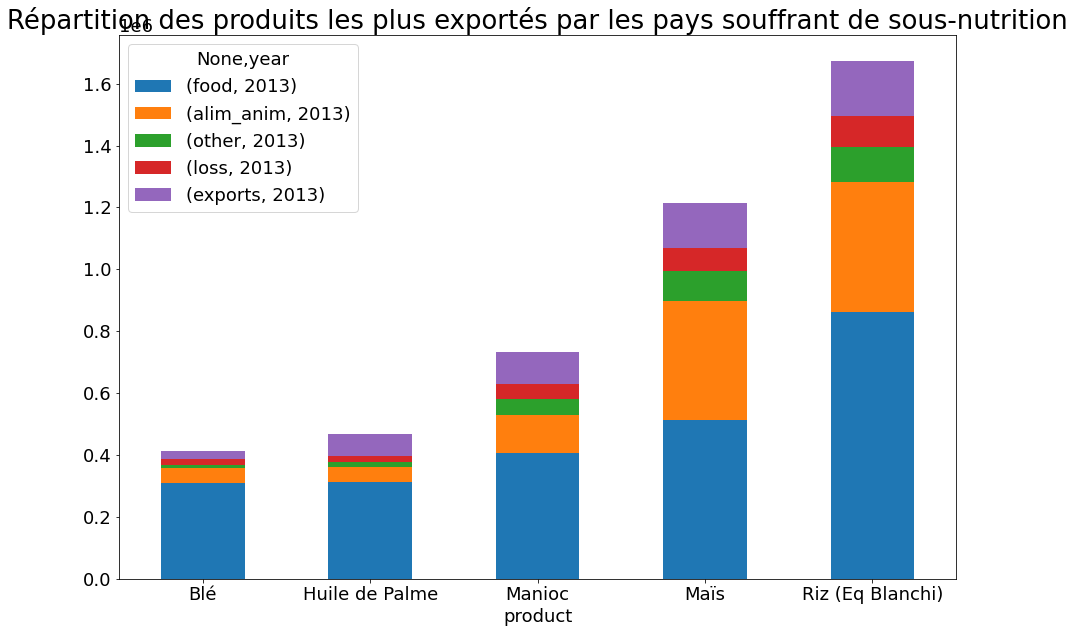

In [164]:
bilan_alim_graph = pd.merge(bilan_alim, s_alim_final, on=['country_code', 'country', 'year', 'population'])
bilan_alim_graph = bilan_alim_graph.sort_values('nb_s_alim', ascending = False)
bilan_alim_graph[bilan_alim_graph.nb_s_alim.notnull()]
bilan_alim_graph = bilan_alim_graph.loc[(bilan_alim_graph['nb_s_alim']> 0)]
array = ['Huile de Palme', 'Manioc', 'Maïs','Riz (Eq Blanchi)','Blé']
bilan_alim_graph=bilan_alim_graph.loc[bilan_alim_graph['product'].isin(array)]
bilan_alim_graph.groupby(['product','year']).sum().groupby(level=[1]).cumsum().unstack().plot(kind='bar',y=['food','alim_anim','other','loss','exports'], stacked = True, figsize=(15,10))
plt.xticks(rotation='horizontal')
plt.title ('Répartition des produits les plus exportés par les pays souffrant de sous-nutrition')

(array([0]), <a list of 1 Text major ticklabel objects>)

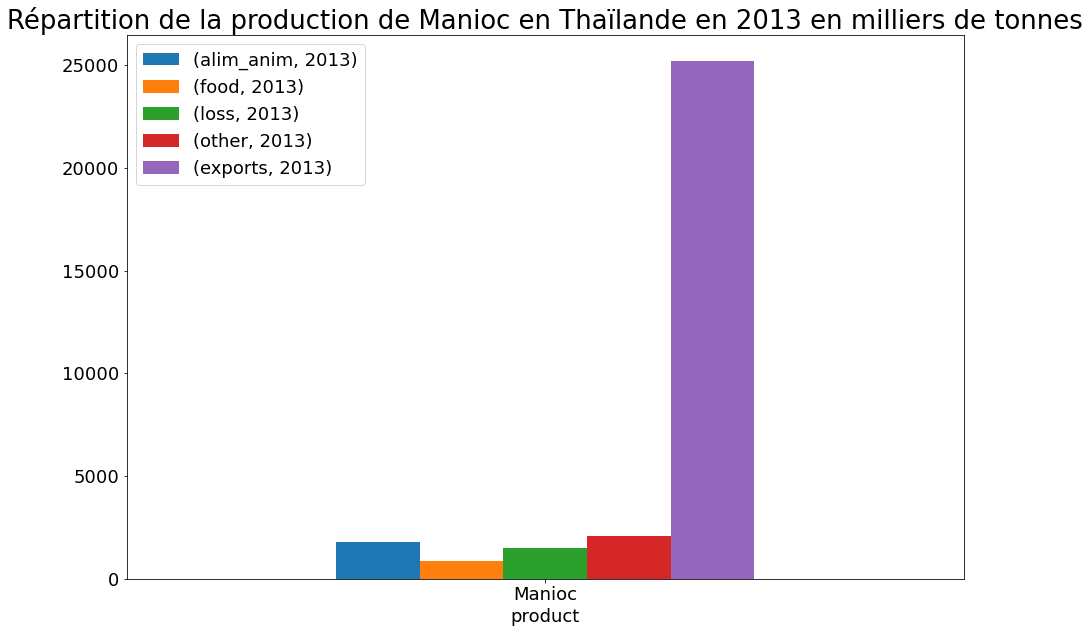

In [165]:
bilan_alim_graph = bilan_alim_graph.loc[(bilan_alim_graph['country']== 'Thaïlande')]
array = ['Manioc']
bilan_alim_graph=bilan_alim_graph.loc[bilan_alim_graph['product'].isin(array)]
bilan_alim_graph.groupby(['product','year']).sum().groupby(level=[1]).cumsum().unstack().plot(kind='bar',y=['alim_anim','food','loss','other','exports'], stacked = False, figsize=(15,10))
plt.legend()
plt.title ('Répartition de la production de Manioc en Thaïlande en 2013 en milliers de tonnes')
plt.xticks(rotation='horizontal')

(array([0]), <a list of 1 Text major ticklabel objects>)

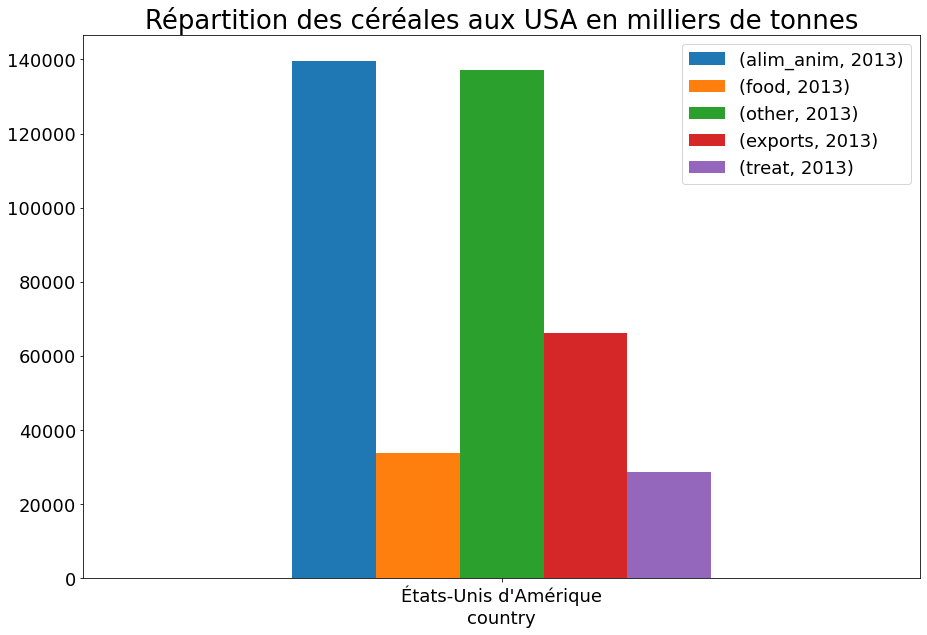

In [166]:
bilan_alim_usa = bilan_alim.loc[(bilan_alim['country'] == 'États-Unis d\'Amérique')&(bilan_alim['is_cereal']==True)]
bilan_alim_usa.groupby(['country','year']).sum().groupby(level=[1]).cumsum().unstack().plot(kind='bar',y=['alim_anim','food','other','exports','treat'], stacked = False, figsize=(15,10))
plt.legend()
plt.title('Répartition des céréales aux USA en milliers de tonnes')
plt.xticks(rotation='horizontal')

Text(0.5, 1.0, "Répartition des produits d'origine végétal")

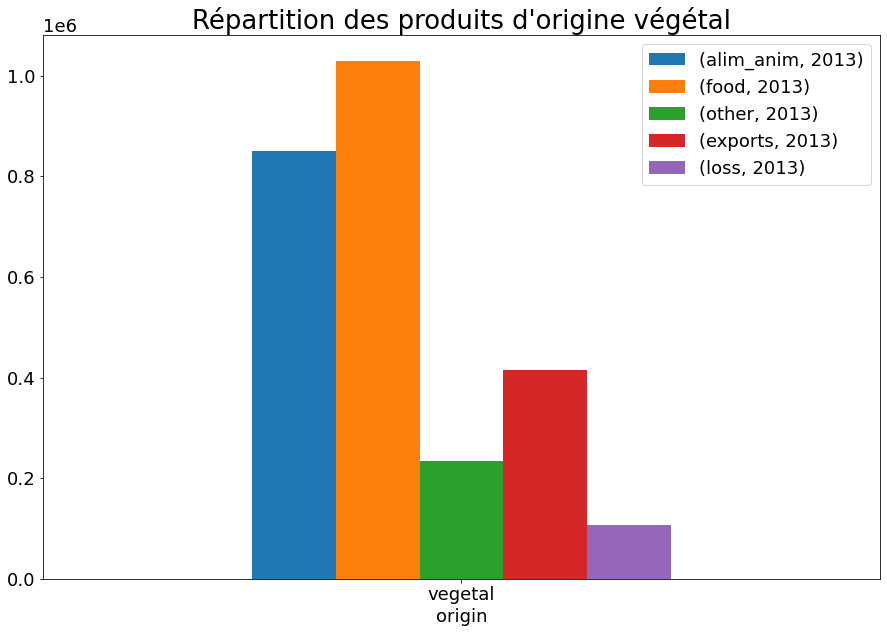

In [167]:
bilan_veg = bilan_alim.loc[(bilan_alim['is_cereal'] == True)]
bilan_veg.groupby(['origin','year']).sum().groupby(level=[1]).cumsum().unstack().plot(kind='bar',y=['alim_anim','food','other','exports','loss'], stacked = False, figsize=(15,10))
plt.legend()
plt.xticks(rotation='horizontal')
plt.title('Répartition des produits d\'origine végétal')

In [174]:
params = {'legend.fontsize': 'large',
         'axes.labelsize': 'large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'large',
         'ytick.labelsize':'xx-large'
         }
pylab.rcParams.update(params)

Text(0.5, 1.0, "Répartition des céréales destinés à l'alimentation humaine")

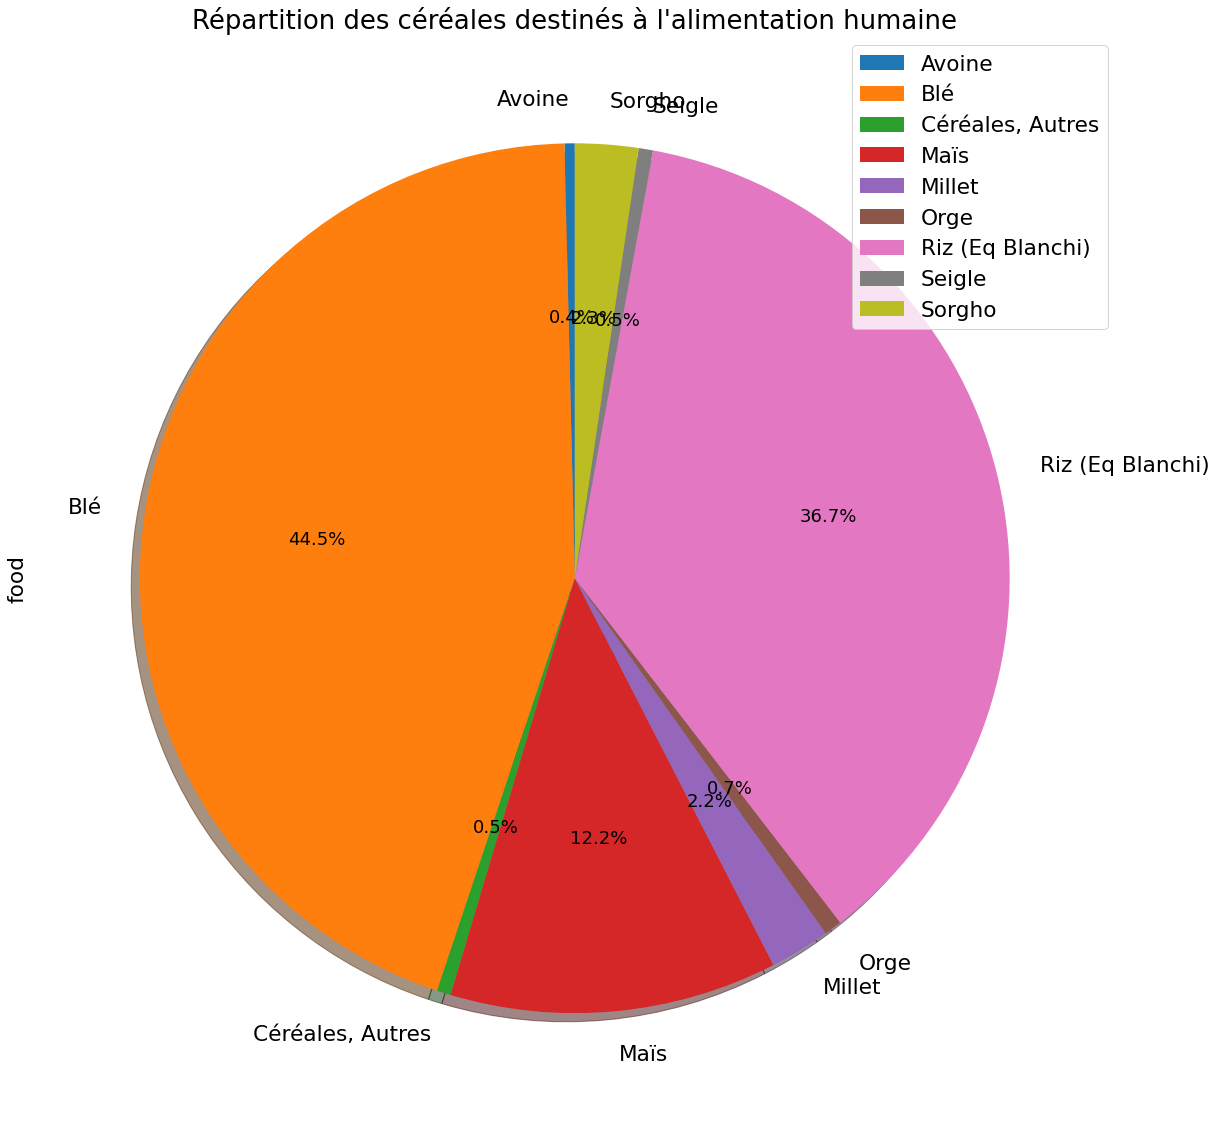

In [175]:
bilan_veg.groupby(['product']).sum().plot(kind='pie',y='food', subplots=True, shadow = True,startangle=90,
figsize=(25,20), autopct='%1.1f%%')
plt.title('Répartition des céréales destinés à l\'alimentation humaine')

In [172]:
params = {'legend.fontsize': 'xx-small',
         'axes.labelsize': 'large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'large',
         'ytick.labelsize':'xx-large',
         }
pylab.rcParams.update(params)

Text(0.5, 1.0, "Répartition des céréales destinés à l'alimentation animal")

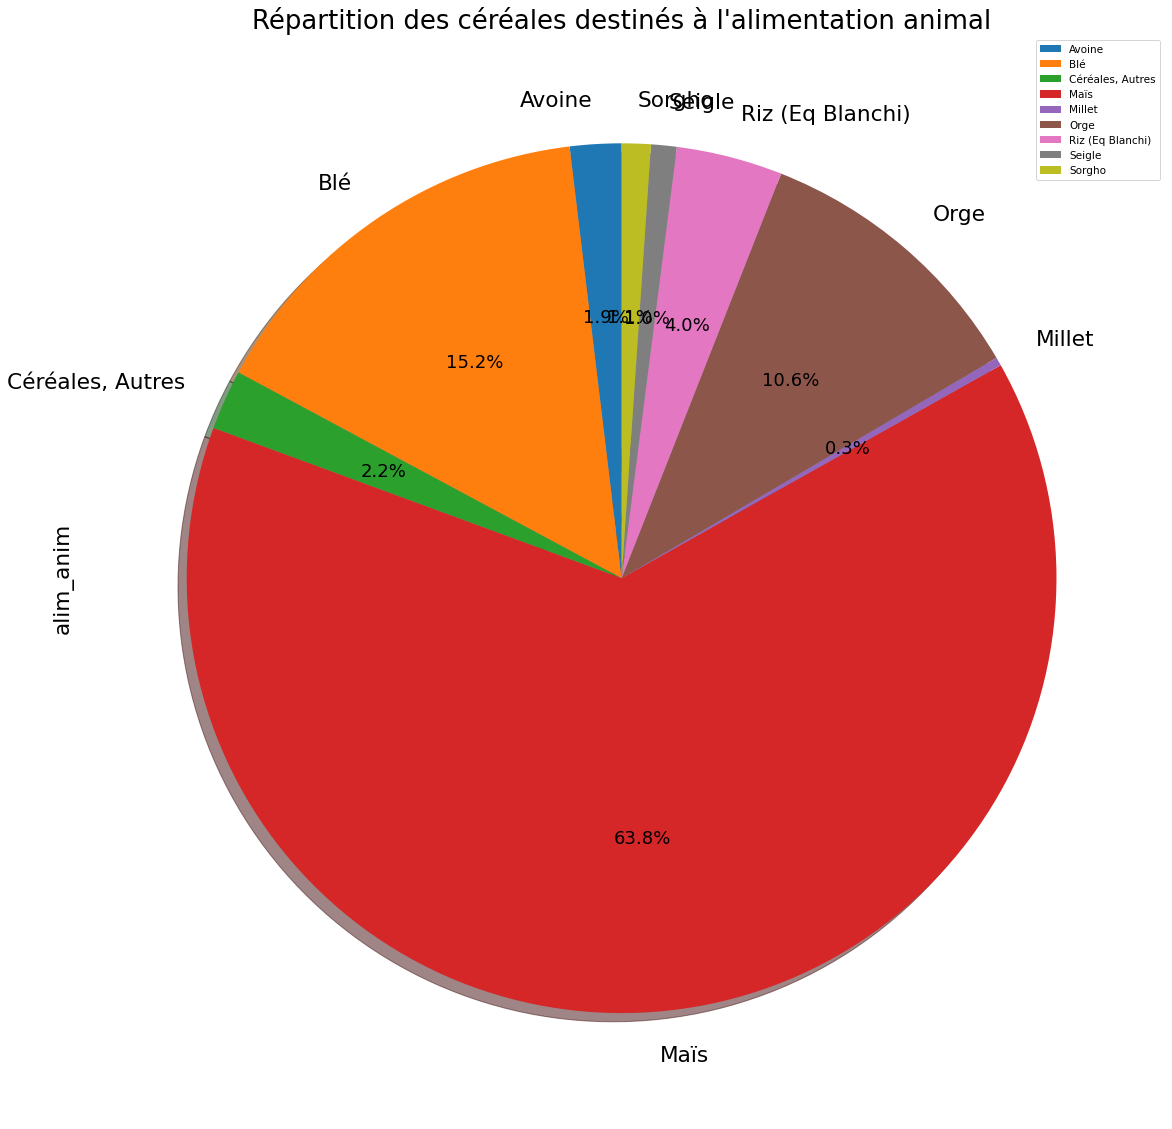

In [171]:
bilan_veg.groupby(['product']).sum().plot(kind='pie',y='alim_anim', subplots=True, shadow = True,startangle=90,
figsize=(25,20), autopct='%1.1f%%')
plt.title('Répartition des céréales destinés à l\'alimentation animal')